In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/compas-scores.csv')
df2=df[['compas_screening_date','decile_score','v_decile_score','is_recid','is_violent_recid','r_offense_date','sex','race']]
print(df2.dropna()[['compas_screening_date', 'r_offense_date']].min())
print(df2.dropna()[['compas_screening_date', 'r_offense_date']].max())
df2

compas_screening_date    2013-01-01
r_offense_date           2013-01-03
dtype: object
compas_screening_date    2014-12-31
r_offense_date           2016-03-29
dtype: object


,compas_screening_date,decile_score,v_decile_score,is_recid,is_violent_recid,r_offense_date,sex,race
0,2013-08-14,1,1,0,0,NaN,Male,Other
1,2014-12-31,5,2,-1,0,NaN,Male,Caucasian
2,2013-01-27,3,1,1,1,2013-07-05,Male,African-American
3,2013-04-14,4,3,1,0,2013-06-16,Male,African-American
4,2013-01-13,8,6,0,0,NaN,Male,African-American
...,...,...,...,...,...,...,...,...
11752,2013-09-22,3,1,0,0,NaN,Male,Other
11753,2013-05-17,7,5,1,0,2014-10-11,Male,Caucasian
11754,2014-10-08,4,3,0,0,NaN,Male,Other
11755,2013-12-03,3,2,0,0,NaN,Male,Caucasian


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11757 entries, 0 to 11756
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   compas_screening_date  11757 non-null  object
 1   decile_score           11757 non-null  int64 
 2   v_decile_score         11757 non-null  int64 
 3   is_recid               11757 non-null  int64 
 4   is_violent_recid       11757 non-null  int64 
 5   r_offense_date         3703 non-null   object
 6   sex                    11757 non-null  object
 7   race                   11757 non-null  object
dtypes: int64(4), object(4)
memory usage: 734.9+ KB


In [ ]:
df2.describe()

,decile_score,v_decile_score,is_recid,is_violent_recid
count,11757.000000,11757.000000,11757.000000,11757.000000
mean,4.371268,3.571489,0.253806,0.075019
std,2.877598,2.500479,0.558324,0.263433
min,-1.000000,-1.000000,-1.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000
50%,4.000000,3.000000,0.000000,0.000000
75%,7.000000,5.000000,1.000000,0.000000
max,10.000000,10.000000,1.000000,1.000000


In [ ]:
#decile_score y v_decile_score deben ser valores entre 1 y 10 por tanto los valores que sean -1 los vamos a cambiar por 1
df2.loc[df2['decile_score'] == -1, 'decile_score'] = 1
df2.loc[df2['v_decile_score'] == -1, 'decile_score'] = 1
df2['decile_score'].value_counts()

1     2592
2     1572
3     1259
4     1199
5     1034
6      993
7      900
9      802
8      796
10     610
Name: decile_score, dtype: int64

In [ ]:
df2['is_recid'].value_counts()

 0    7335
 1    3703
-1     719
Name: is_recid, dtype: int64

In [ ]:
#En la columna is_recid no tiene mucho sentido el valor -1 ya que para mi simboliza lo mismo que el 0, es decir que no ha sido reincidente.
#Para comprobarlo vamos a ver si cuando is_recid=-1 la columna de la fecha de la reincidencia esta vacia(al igual que cuando is_recid=0)
df2['r_offense_date'][df2['is_recid']==-1].value_counts()

Series([], Name: r_offense_date, dtype: int64)

In [ ]:
#Como efectivamente -1 y 0 tienen el mismo significado en la columna is_recid vamos a cambiar los -1 por 0
df2.loc[df2['is_recid'] == -1, 'is_recid'] = 0
df2['is_recid'].value_counts()

0    8054
1    3703
Name: is_recid, dtype: int64

In [ ]:
# Convierte las columnas a tipos de fecha si aún no están en ese formato
df2['compas_screening_date'] = pd.to_datetime(df2['compas_screening_date'])
df2['r_offense_date'] = pd.to_datetime(df2['r_offense_date'])

# Calcula las diferencias entre las fechas
df2['date_difference'] = (df2['r_offense_date']- df2['compas_screening_date']).dt.days
df2['año'] = df2['compas_screening_date'].dt.year
df2 = df2.sort_values(by='compas_screening_date')

**GRÁFICAS**

Gráfica 1.

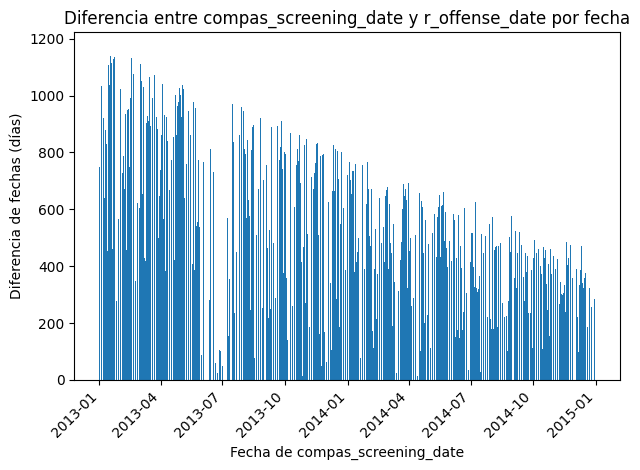

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras
plt.bar(df2['compas_screening_date'], df2['date_difference'])
plt.title('Diferencia entre compas_screening_date y r_offense_date por fecha')
plt.xlabel('Fecha de compas_screening_date')
plt.ylabel('Diferencia de fechas (días)')
plt.xticks(rotation=45, ha='right')  # Rotar las fechas para una mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar recorte de etiquetas
plt.show()

Gráfica 2.

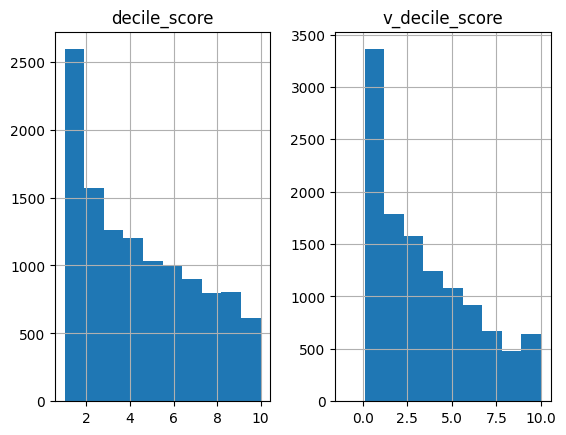

In [ ]:
df2.hist(column = ['decile_score','v_decile_score']);

Gráfica 3.

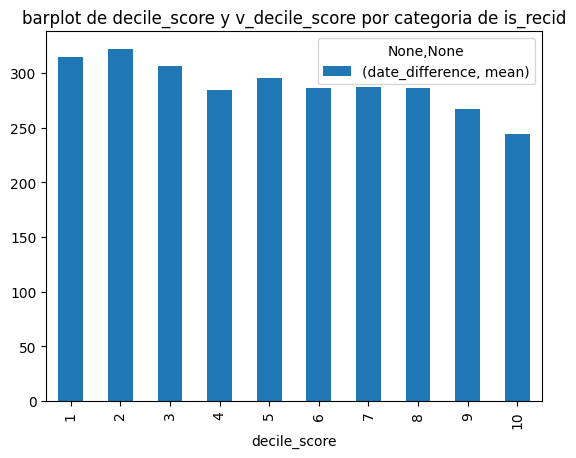

In [ ]:
df_group = df2.groupby('decile_score')[['date_difference']].agg(['mean'])
df_group.plot.bar(title = 'barplot de por valor de decile_score');

Gráfica 4.

<Axes: title={'center': 'barplot de decile_score y v_decile_score por categoria de is_recid'}, xlabel='sex'>

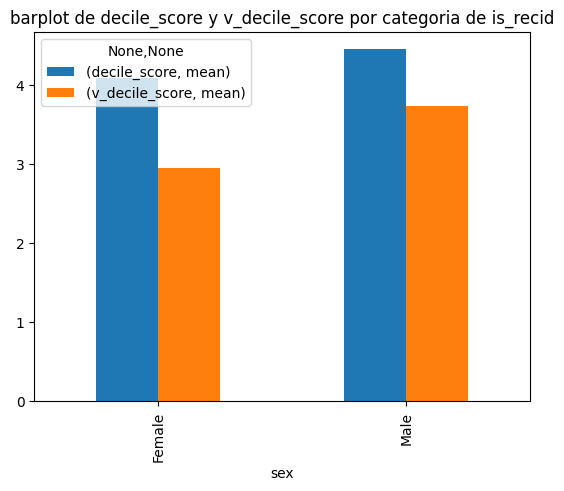

In [ ]:
df_group = df2.groupby('sex')[['decile_score','v_decile_score']].agg(['mean'])
df_group.plot.bar(title = 'barplot de decile_score y v_decile_score por categoria de sexo')

Gráfica 5.

<Axes: title={'center': 'barplot de decile_score y v_decile_score por categoria de is_recid'}, xlabel='race'>

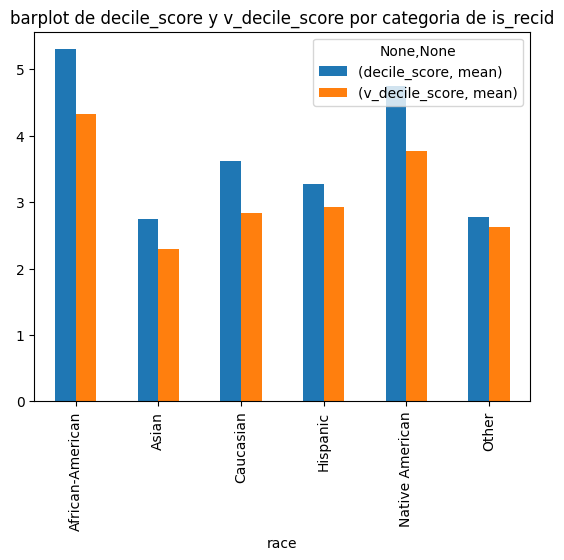

In [ ]:
df_group = df2.groupby('race')[['decile_score','v_decile_score']].agg(['mean'])
df_group.plot.bar(title = 'barplot de decile_score y v_decile_score por categoria de raza')

Gráfica 6.

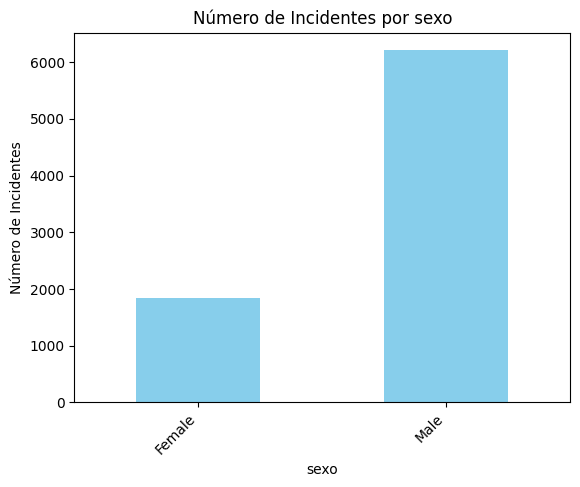

In [ ]:
incidentes_por_sexo = df2.groupby('sex')['incidente'].sum()

# Crear un gráfico de barras
incidentes_por_sexo.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Número de Incidentes por sexo')
plt.xlabel('sexo')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

Gráfica 7.

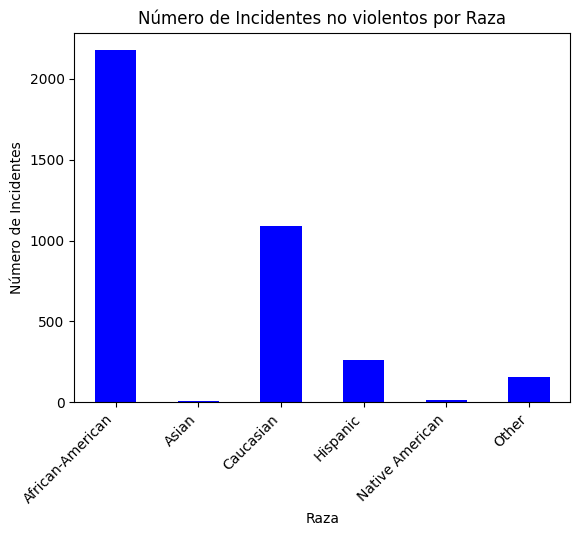

In [ ]:
incidentes_por_raza = df2.groupby('race')['is_recid'].sum()

# Crear un gráfico de barras
incidentes_por_raza.plot(kind='bar', color='blue')

# Personalizar el gráfico
plt.title('Número de Incidentes no violentos por Raza')
plt.xlabel('Raza')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

Gráfica 8.

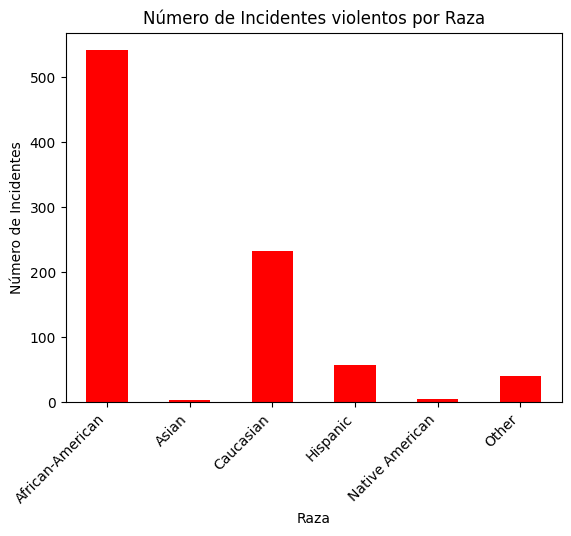

In [ ]:
incidentes_por_raza = df2.groupby('race')['is_violent_recid'].sum()

# Crear un gráfico de barras
incidentes_por_raza.plot(kind='bar', color='red')

# Personalizar el gráfico
plt.title('Número de Incidentes violentos por Raza')
plt.xlabel('Raza')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

No me parece justa la asignacion de evaluaciones para los nativos americanos debido a la diferencia de las graficas 7 y 8 con la grafica 5 en las cuales se evaluan a los native american por encima de incluso los caucasian pero luego su tasa de reincidencia es no solo muy inferior a la de los caucasian si no también de las mas bajas.
No obstante para el resto de razas no me parece una forma de evaluación injusta